In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [3]:
data = pd.read_csv("../input/twitter-sentiment-dataset/Twitter_Data.csv")
data.head(5)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
data.isnull().sum()

clean_text    4
category      7
dtype: int64

In [5]:
data.shape

(162980, 2)

In [6]:
data.category.nunique(), data.category.unique()

(3, array([-1.,  0.,  1., nan]))

In [7]:
data = data.dropna()
data.isnull().sum()

clean_text    0
category      0
dtype: int64

In [8]:
data = data.sample(frac = 1).reset_index(drop = True)
data.head(5)

,clean_text,category
0,have not done balakot air strikes the armed fo...,1.0
1,looks like modi tsunami the making for 2019 co...,-1.0
2,hnrble modi hume apki jarurat sirf nehiharbar ...,0.0
3,absolutely right about ram mandir building ple...,-1.0
4,course not all 80cr hindus are fascists but on...,-1.0


In [9]:
labels = pd.get_dummies(data.category)
labels.columns = ["negative", "neutral", "positive"]
labels.head(5)

,negative,neutral,positive
0,0,0,1
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [10]:
data = data.drop(columns = "category")
data.head(3)

,clean_text
0,have not done balakot air strikes the armed fo...
1,looks like modi tsunami the making for 2019 co...
2,hnrble modi hume apki jarurat sirf nehiharbar ...


In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = 8150, lower = True, split = " ", oov_token = "~")
tokenizer.fit_on_texts(data["clean_text"])

In [12]:
word_index = tokenizer.word_index
len(word_index)

113679

In [13]:
print(list(word_index.keys())[:100]) #first 100 tokens in word_index

['~', 'modi', 'the', 'and', 'for', 'you', 'not', 'will', 'this', 'india', 'are', 'that', 'with', 'has', 'have', 'but', 'all', 'from', 'was', 'his', 'they', 'bjp', 'who', 'people', 'what', 'congress', 'like', 'your', 'only', 'now', 'narendra', 'can', 'why', 'our', 'its', 'govt', 'about', 'one', 'vote', 'dont', 'him', 'just', 'when', 'their', 'modis', 'more', 'country', 'how', 'election', 'years', 'should', 'time', 'rahul', 'did', 'indian', 'any', 'nation', 'against', 'even', 'after', 'then', 'also', 'which', 'there', 'out', 'know', 'government', 'again', 'them', 'get', 'power', 'want', 'had', 'gandhi', 'because', 'than', 'minister', 'good', 'give', 'these', 'been', 'would', 'space', 'money', 'said', 'says', 'under', 'see', 'hai', 'done', 'credit', 'party', 'sir', 'pakistan', 'make', 'were', 'prime', 'every', 'think', 'say']


In [14]:
data["clean_text"] = tokenizer.texts_to_sequences(data["clean_text"])

In [15]:
data.head(3)

,clean_text
0,"[15, 7, 90, 596, 273, 591, 3, 906, 431, 15, 90..."
1,"[689, 27, 2, 3019, 3, 210, 5, 108, 197, 1420, ..."
2,"[1, 2, 6991, 1, 1, 2246, 1, 1, 111, 1, 2603, 8..."


In [16]:
len(data.clean_text[0]), len(data.clean_text[1]), len(data.clean_text[2])
#length of the sequences are different

(23, 34, 26)

In [17]:
tweets = pad_sequences(data["clean_text"]) #padding the sequences to get same shapes

In [18]:
tweets[0].shape, tweets[1].shape, tweets[2].shape
#now length of each sequence is same

((52,), (52,), (52,))

In [19]:
tweets.shape

(162969, 52)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size = 0.15)

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((138523, 52), (138523, 3), (24446, 52), (24446, 3))

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2)

In [23]:
print(f"""
Training set: tweets = {X_train.shape}, labels = {y_train.shape},
Validation set: tweets = {X_valid.shape}, labels = {y_valid.shape},
Test set: tweets = {X_test.shape}, labels = {y_test.shape}
""")


Training set: tweets = (110818, 52), labels = (110818, 3),
Validation set: tweets = (27705, 52), labels = (27705, 3),
Test set: tweets = (24446, 52), labels = (24446, 3)



In [24]:
model = keras.models.Sequential([
    keras.layers.Embedding(input_dim = 8150, output_dim = 32),
    keras.layers.GRU(128),
    keras.layers.Dense(128, activation = "leaky_relu", kernel_initializer = "he_normal", kernel_regularizer = "l1"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation = "softmax", kernel_initializer = "glorot_normal")
])
model.summary()

2022-12-11 16:19:16.678899: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 16:19:16.771547: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 16:19:16.772304: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 16:19:16.773652: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          260800    
_________________________________________________________________
gru (GRU)                    (None, 128)               62208     
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 339,907
Trainable params: 339,907
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [26]:
history = model.fit(
    X_train, y_train, 
    epochs = 5, validation_data = (X_valid, y_valid),
    callbacks = [keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)]
)

2022-12-11 16:19:23.331788: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-12-11 16:19:26.737294: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


3464/3464 [==============================] - 26s 6ms/step - loss: 0.9599 - accuracy: 0.8411 - val_loss: 0.4289 - val_accuracy: 0.9250
Epoch 2/5
3464/3464 [==============================] - 21s 6ms/step - loss: 0.3389 - accuracy: 0.9469 - val_loss: 0.2861 - val_accuracy: 0.9585
Epoch 3/5
3464/3464 [==============================] - 20s 6ms/step - loss: 0.2865 - accuracy: 0.9625 - val_loss: 0.2805 - val_accuracy: 0.9602
Epoch 4/5
3464/3464 [==============================] - 21s 6ms/step - loss: 0.2648 - accuracy: 0.9679 - val_loss: 0.2712 - val_accuracy: 0.9641
Epoch 5/5
3464/3464 [==============================] - 21s 6ms/step - loss: 0.2504 - accuracy: 0.9717 - val_loss: 0.2754 - val_accuracy: 0.9669


In [27]:
model.evaluate(X_test, y_test)

764/764 [==============================] - 2s 3ms/step - loss: 0.2811 - accuracy: 0.9655


[0.28110140562057495, 0.9654749035835266]

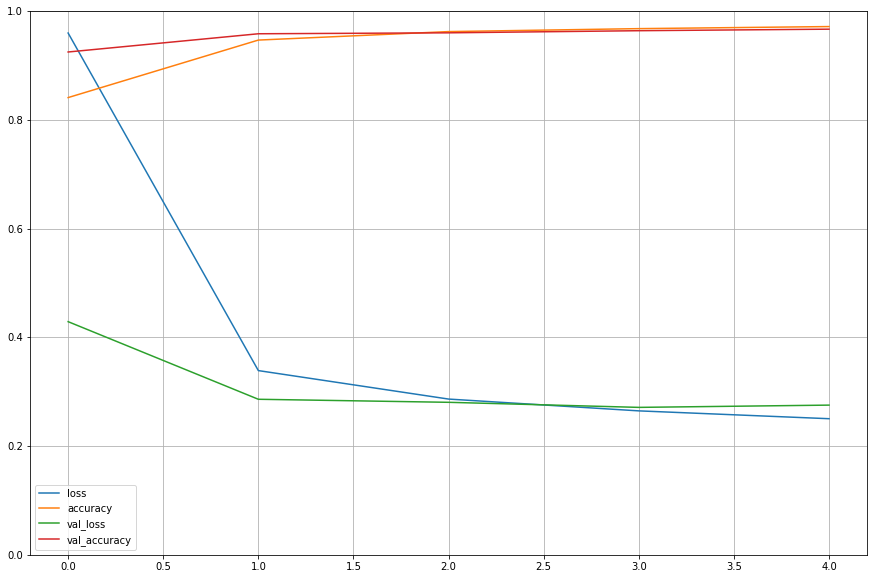

In [28]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (15, 10))
plt.grid(True)
plt.ylim(0, 1)
plt.show()